In [1]:
#import my functions
import utils._modelDefinitions as _model
import utils._indexDefinitions as _index
import utils.overlapBins as overlapBins


In [2]:
import xarray
import matplotlib.pyplot as plt
import numpy
import pandas

%matplotlib inline

In [3]:
annualCompoundsXr=xarray.open_dataset('results/cmip6EcCompounds.nc')


In [30]:
piControlXr=annualCompoundsXr.sel(experiment='piControl', drop=True)
experimentXr=annualCompoundsXr.sel(experiment='ssp585',year=slice(1850,2099), drop=True)

# Compound in 30 year overlapping bins

In [31]:
expBinSumXr=overlapBins.binSum(experimentXr)

In [29]:
climatList = list()

#using bin sum is a bit funky because the models have different start and end years
#run binSum for each model seperately, after filtering the nans
for iModel in piControlXr.model.values:
    try:
        print(iModel)

        piCModelXr=piControlXr.sel(model=iModel)
        
        binSumXr=overlapBins.binSum(piCModelXr.where(piCModelXr.isnull()==False, drop=True))
        
        binSumXr['model']=iModel
        
        climatList.append(binSumXr)
        
    except Exception as e:
        print(e)
        
piControlBinSumXr = xarray.concat(climatList, 'model')

ACCESS-CM2
ACCESS-ESM1-5
BCC-CSM2-MR
CAMS-CSM1-0
CAS-ESM2-0
CESM2
CESM2-WACCM
CIESM
CMCC-CM2-SR5
CMCC-ESM2
CNRM-CM6-1
CNRM-ESM2-1
CanESM5
CanESM5-CanOE
EC-Earth3
EC-Earth3-CC
EC-Earth3-Veg
EC-Earth3-Veg-LR
FIO-ESM-2-0
GFDL-CM4
GFDL-ESM4
GISS-E2-1-G
HadGEM3-GC31-LL
HadGEM3-GC31-MM
INM-CM4-8
INM-CM5-0
IPSL-CM6A-LR
MCM-UA-1-0
MIROC-ES2L
MIROC6
MPI-ESM1-2-HR
MPI-ESM1-2-LR
MRI-ESM2-0
NESM3
NorESM2-LM
NorESM2-MM
UKESM1-0-LL


# Time of emergence

In [32]:
%run utils/emergence.ipynb

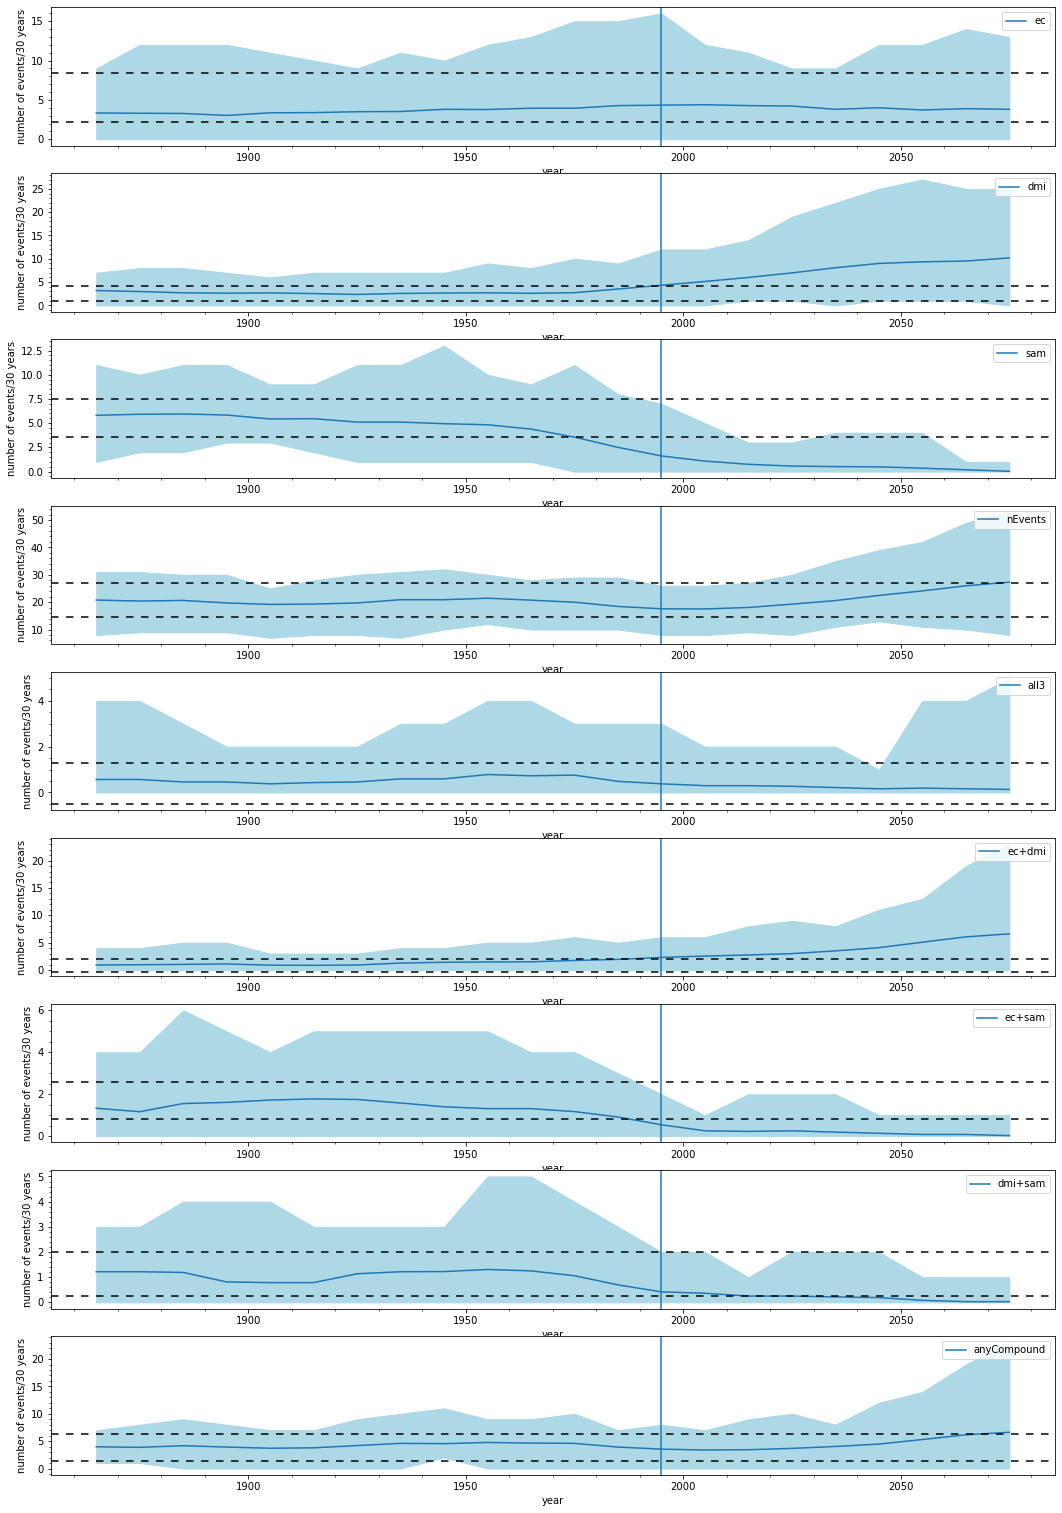

In [36]:
emergePlot(expBinSumXr.sel(fire='pos', drop=True),
           piControlBinSumXr.sel(fire='pos', drop=True)
          )

In [37]:
wangsAnswers={'CAMS-CSM1-0':-0.2902, 
    'CMCC-CM2-SR5':-0.4055, 
    'CNRM-CM6-1':-0.1662, 
    'CNRM-ESM2-1':-0.1687,
    'EC-Earth3':-0.2662, 
    'EC-Earth3-Veg':-0.2665, 
    'FIO-ESM-2-0':-0.3751,
    'MIROC6':-0.3198, 
    'MIROC-ES2L': -0.3466,
    'HadGEM3-GC31-LL':-0.1785, 
    'MPI-ESM1-2-HR':-0.2660, 
    'MPI-ESM1-2-LR':-0.2338, 
    'MRI-ESM2-0':-0.3387,
    'GISS-E2-1-G':-0.3644, 
    'CESM2':-0.3216, 
    'CESM2-WACCM':-0.2436, 
    'NorESM2-LM':-0.2505, 
    'NorESM2-MM':-.2077,
    'GFDL-ESM4':-.1931, 
    'CIESM':-.1886, 
    'MCM-UA-1-0':-0.2888}

In [44]:
chosenModelSet = list(wangsAnswers.keys())

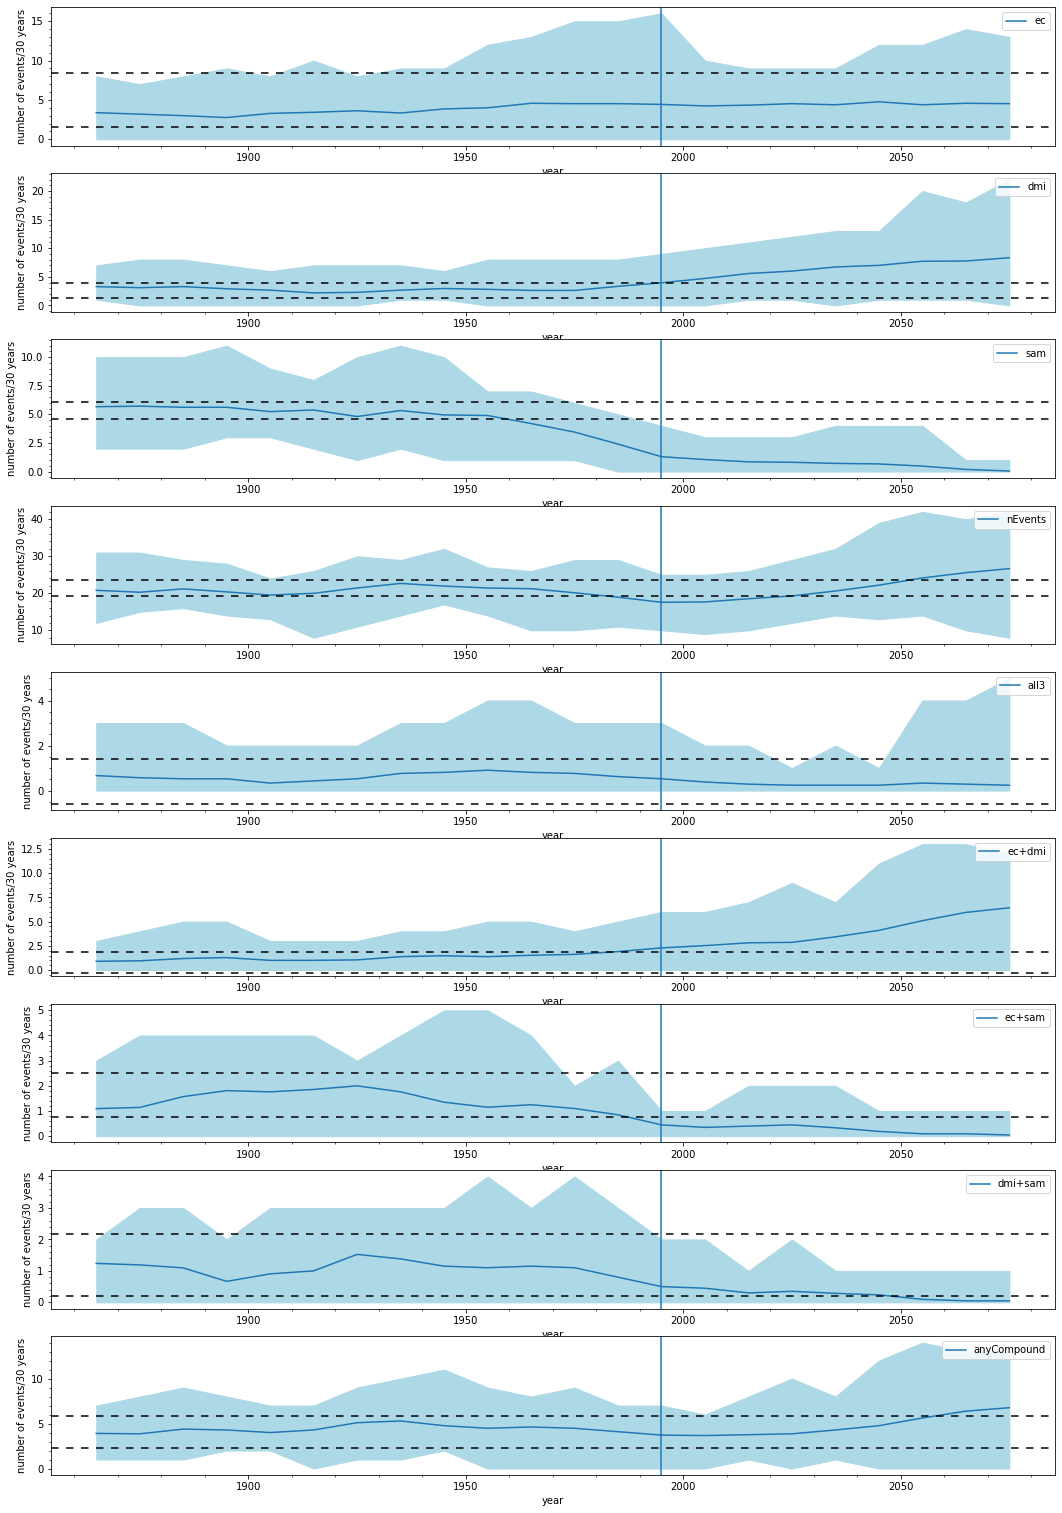

In [45]:
emergePlot(expBinSumXr.sel(fire='pos', model=chosenModelSet, drop=True),
           piControlBinSumXr.sel(fire='pos',model=chosenModelSet, drop=True)
          )